___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Gabriel Duarte

#### Beni Stern

#### Henrique Thome

#### Christiano Borges/Bia Mohr

___

# TEMA AQUI

___

## A. INTRODUÇÃO

[Detalhe aqui o objetivo deste projeto!!]

O futebol moderno nasceu em meados do século XIX e desde então não para de ganhar importância. Com o tempo, devido aos adventos do capitalismo esse esporte se tornou um grande mercado internacional com valores de transferências batendo a casa do bilhão de real, com enfoque nos últimos 5 anos, no qual as cifras aumentaram drasticamente.
Devido a esse forte aumento nos valores da transferência surgem teorias e desconfianças de que alguns jogadores tem seus valores aumentados como uma forma de lavar dinheiro.
Dessa forma esse projeto tem o objetivo de modelar a precificação  dos atletas para servir tanto como uma ferramenta para os dirigentes consultarem o preço de mercado dos atletas quanto para órgãos governamentais consultarem suspeitas de lavagem de dinheiro

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [2]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, probplot
from scipy import stats
import statsmodels.api as sm
%matplotlib

C:\Users\Duarte\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Using matplotlib backend: Qt5Agg


In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Duarte\Downloads\INSPER aqui tbm\DADOS DP\Projeto 3\Projeto-3-Ciencia-dos-Dados


### BASE DE DADOS

In [4]:
dados = pd.read_csv("data.csv")
dados.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
def Filtro(dados,coluna):
    lista = []
    for e in dados[coluna]:
        str_e = str(e)
        novo = str_e.replace("€","").replace("M","").replace("K","").replace("lbs","").replace("'",".").replace("+3","").replace("+2","").replace("+5","").replace("+4","")
        lista.append(float(novo))
    
    return lista

In [58]:
VariaveisEscolhidas = ["Release Clause",'ID','Age','Overall','Potential','Value','Wage','Special','International Reputation','Weak Foot','Skill Moves','Jersey Number','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']
for e in VariaveisEscolhidas:
    dados[e] = pd.DataFrame(Filtro(dados,e))
dados = dados[VariaveisEscolhidas].dropna()
dados.head()

,Release Clause,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,226.5,158023.0,31.0,94.0,94.0,110.5,565.0,2202.0,5.0,4.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,127.1,20801.0,33.0,94.0,94.0,77.0,405.0,2228.0,5.0,4.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,228.1,190871.0,26.0,92.0,93.0,118.5,290.0,2143.0,5.0,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,164.0,176580.0,31.0,91.0,91.0,80.0,455.0,2346.0,5.0,4.0,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
5,104.6,155862.0,32.0,91.0,91.0,51.0,380.0,2201.0,4.0,3.0,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0


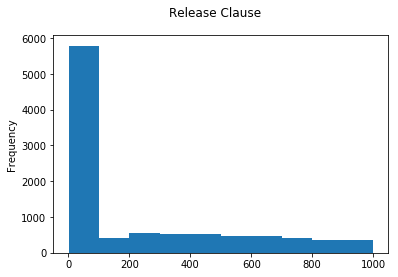

In [54]:
dados['Release Clause'].plot.hist()
plt.suptitle("Release Clause");

In [55]:
dados[VariaveisEscolhidas].corr()

,Release Clause,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Release Clause,1.000000,0.089155,-0.038313,-0.416905,-0.411100,0.280632,-0.214654,-0.337773,-0.169724,-0.072069,...,-0.182063,-0.335432,-0.083172,-0.066757,-0.053511,-0.013358,-0.003275,-0.010128,-0.005169,-0.004752
ID,0.089155,1.000000,-0.736721,-0.426696,0.037358,0.078829,-0.220648,-0.414247,-0.370897,-0.112636,...,-0.269411,-0.473946,-0.196432,-0.163519,-0.131086,-0.052281,-0.076770,-0.075549,-0.072415,-0.068115
Age,-0.038313,-0.736721,1.000000,0.458920,-0.245001,-0.043340,0.153120,0.413820,0.255777,0.100475,...,0.263898,0.477452,0.226659,0.197154,0.164809,0.061049,0.075068,0.079076,0.073418,0.079729
Overall,-0.416905,-0.426696,0.458920,1.000000,0.665216,-0.263982,0.580435,0.802596,0.513644,0.214188,...,0.404565,0.809388,0.305262,0.268047,0.225766,0.044558,0.046826,0.057656,0.042337,0.044345
Potential,-0.411100,0.037358,-0.245001,0.665216,1.000000,-0.267960,0.494391,0.483770,0.391908,0.150727,...,0.245088,0.485591,0.151353,0.129877,0.112877,-0.014427,-0.017161,-0.008780,-0.010193,-0.030612
Value,0.280632,0.078829,-0.043340,-0.263982,-0.267960,1.000000,-0.260525,-0.212555,-0.219961,-0.062429,...,-0.144297,-0.229785,-0.051236,-0.042403,-0.034089,-0.001971,-0.000986,0.010448,0.007113,0.014904
Wage,-0.214654,-0.220648,0.153120,0.580435,0.494391,-0.260525,1.000000,0.458355,0.681491,0.135616,...,0.263190,0.465553,0.154400,0.133020,0.113594,0.019089,0.001096,0.012898,0.013667,0.011828
Special,-0.337773,-0.414247,0.413820,0.802596,0.483770,-0.212555,0.458355,1.000000,0.419950,0.257216,...,0.529695,0.750733,0.267793,0.251499,0.217635,0.066594,0.072407,0.084331,0.067683,0.063111
International Reputation,-0.169724,-0.370897,0.255777,0.513644,0.391908,-0.219961,0.681491,0.419950,1.000000,0.136379,...,0.300742,0.452665,0.132340,0.108065,0.087763,-0.004924,-0.018138,-0.002856,-0.005381,-0.013924
Weak Foot,-0.072069,-0.112636,0.100475,0.214188,0.150727,-0.062429,0.135616,0.257216,0.136379,1.000000,...,0.253499,0.234102,-0.096862,-0.118224,-0.131430,0.017760,0.008307,0.005583,0.013081,0.008655


In [57]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

variaveis = ['Age','Overall','Potential','Value','Wage','Special','International Reputation','Weak Foot','Skill Moves','Jersey Number','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']

y = dados['Release Clause']
x = dados[variaveis]

results = regress(x,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Release Clause   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     59.36
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        14:38:49   Log-Likelihood:                -68971.
No. Observations:                9886   AIC:                         1.381e+05
Df Residuals:                    9829   BIC:                         1.385e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1443.5613     89.042     16.212      0.000    1269.021    1618.102
Age                          6.2132      1.309      4.746      0.000       3.647       8.779
Overall                    -12.5008      1.477     -8.462      0.000     -15.396      -9.605
Potential                   -7.0701      1.095     -6.459      0.000      -9.216      -4.925
Value                        0.1709      0.010     17.928      0.000       0.152       0.190
Wage                         1.0102      0.169      5.967      0.000       0.678       1.342
Special                      1.1868      1.502      0.790      0.429      -1.757       4.130
International Reputation    41.3404      9.197      4.495      0.000      23.312      59.369
Weak Foot                   14.2021      4.376      3.245      0.001       5.624      22.780
Skill Moves                -53.9665      6.718     -8.033      0.000     -67.136     -40.797
Jersey Number                0.1783      0.175      1.018      0.309      -0.165       0.521
Height                       1.1991      6.800      0.176      0.860     -12.129      14.528
Weight                       0.1381      0.287      0.480      0.631      -0.425       0.701
LS                          -3.0454      3.054     -0.997      0.319      -9.033       2.942
ST                          -3.0454      3.054     -0.997      0.319      -9.033       2.942
RS                          -3.0454      3.054     -0.997      0.319      -9.033       2.942
LW                           5.9335      4.584      1.295      0.196      -3.051      14.918
LF                           4.2983      3.000      1.433      0.152      -1.582      10.179
CF                           4.2983      3.000      1.433      0.152      -1.582      10.179
RF                           4.2983      3.000      1.433      0.152      -1.582      10.179
RW                           5.9335      4.584      1.295      0.196      -3.051      14.918
LAM                          0.3745      3.040      0.123      0.902      -5.585       6.334
CAM                          0.3745      3.040      0.123      0.902      -5.585       6.334
RAM                          0.3745      3.040      0.123      0.902      -5.585       6.334
LM                           3.7634      4.576      0.822      0.411      -5.206      12.733
LCM                         -0.3779      3.061     -0.123      0.902      -6.379       5.623
CM                          -0.3779      3.061     -0.123      0.902      -6.379       5.623
RCM                         -0.3779      3.061     -0.123      0.902      -6.379       5.623
RM                           3.7634      4.576      0.822      0.411      -5.206      12.733
LWB                          6.9477      4.563      1.523      0.128      -1.997      15.892
LDM           

### ANÁLISE DESCRITIVA

___
## C. MODELOS DE PREDIÇÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS